In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

anos = range(2019, 2025)
dfs = [pd.read_csv(f'IMP_{ano}.csv', sep=';', dtype={'CO_NCM': str}) for ano in anos]
df = pd.concat(dfs, ignore_index=True)


In [4]:
df = df[df['CO_NCM'] == '84713012'].copy()
df['CO_ANO'] = df['CO_ANO'].astype(int)
df['CO_MES'] = df['CO_MES'].astype(int)
df['date'] = pd.to_datetime(df['CO_ANO'].astype(str) + '-' + df['CO_MES'].astype(str).str.zfill(2) + '-01')
ts = df.groupby('date')['KG_LIQUIDO'].sum().sort_index()
ts = ts.asfreq('MS', fill_value=0)


In [5]:
train = ts[:'2023-12-01']
test = ts['2024-01-01':]

In [8]:

from pmdarima import auto_arima


model = auto_arima(train, seasonal=True, m=1, trace=True,
                   error_action='ignore', suppress_warnings=True)

forecast = model.predict(n_periods=len(test)) # Prever os 12 meses de 2024


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1289.772, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1298.471, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1291.832, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1295.704, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1399.947, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1288.079, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1292.987, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1290.242, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1289.538, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1289.298, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1288.421, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1291.427, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1290.633, Time=0.03 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 0.304 seconds


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

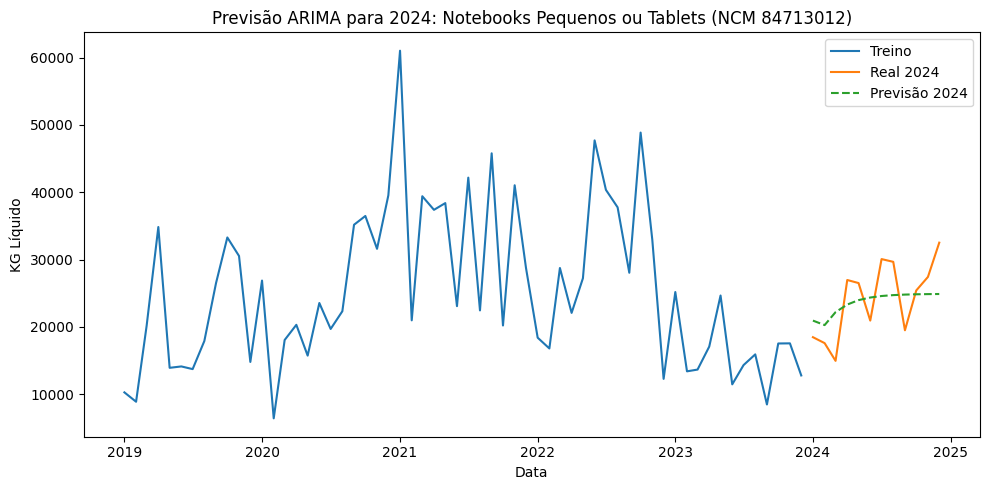

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Treino')
plt.plot(test.index, test, label='Real 2024')
plt.plot(test.index, forecast, label='Previsão 2024', linestyle='--')
plt.xlabel('Data')
plt.ylabel('KG Líquido')
plt.title('Previsão ARIMA para 2024: Notebooks Pequenos ou Tablets (NCM 84713012)')
plt.legend()
plt.tight_layout()
plt.show()
